# Data Visualization
We'll take a look at two different libraries for data visulization:
* **Matplotlib**: this is probably the most commonly used data visualization package for Python. There are many examples in the [Matplotlib documentation](https://matplotlib.org/). For the examples here, I'll use the `pyplot` module. There are more advanced plotting options (similar to MATLAB) that are well documented in the link above.
* **Seaborn**: this library is actually built on top of Matplotlib with a focus on more statistically oriented plotting. Here is a link to the [Seaborn documentation](https://seaborn.pydata.org/).


In [1]:
# import necessary libraries
import pandas as pd # for data frames, reading and writing data
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
from math import sqrt

# the next line is so that the matplot lib plots show up in the notebook cell
%matplotlib inline

## Load Data
Let's use the same sample data that we used before in the Pandas section. We'll load the user data, since that has the most fields and potential for "dirty" data.

In [2]:
filename = 'sample_data.xlsx'
user_df = pd.read_excel(filename, sheet_name='user_data')
tweet_df = pd.read_excel(filename, sheet_name='tweet_data')
tweets_classified = pd.read_excel(filename, sheet_name='tweets_classified')
user_df.head()

,id,id_str,name,screen_name,location,followers_count,friends_count,favourites_count,description,geo_enabled,...,statuses_count,time_zone,created_at,verified,utc_offset,contributors_enabled,listed_count,protected,url,state
0,8192222,8192222,Jezebel,Jezebel,NaN,318516,29,94,All the news you need. Without airbrushing.,0,...,81056,Eastern Time (US & Canada),2007-08-14 22:57:34,1,-14400.0,0,6709,0,http://jezebel.com,NaN
1,11801852,11801852,Jenna Hatfield,JennaHatfield,Cambridge OH,10024,6808,21156,Award winning writer. Editor. Wife. Mom. Dog l...,0,...,106425,Eastern Time (US & Canada),2008-01-03 15:51:49,0,-14400.0,0,577,0,http://stopdropandblog.com,Ohio
2,12366342,12366342,King County Library,KCLS,King County WA,10442,235,4417,King County Library System (KCLS) is your comm...,1,...,17786,Pacific Time (US & Canada),2008-01-17 17:51:28,0,-28800.0,0,548,0,http://www.kcls.org,Washington
3,14362996,14362996,Alanna Banks,fridaysoffshop,Toronto,765,850,32,Shop Owner at fridaysoff.ca an online source o...,0,...,1946,Quito,2008-04-11 17:49:07,0,-18000.0,0,48,0,http://fridaysoff.ca,NaN
4,15430687,15430687,C.B. Cebulski,CBCebulski,Shanghai China,55961,869,11642,Just a guy lucky enough to work for Marvel. Tr...,0,...,22157,Eastern Time (US & Canada),2008-07-14 19:04:35,1,-14400.0,0,1889,0,http://www.eataku.tumblr.com,NaN


## Super-Simplified Plotting w. Pandas
Pandas has some of basic plotting functionality directly connected to matplotlib. With that, you can create basic plots by calling methods right off of a data frame. Let's create a column in the users table for the month the user was created and then make a quick histogram from that.

### Pandas Histogram

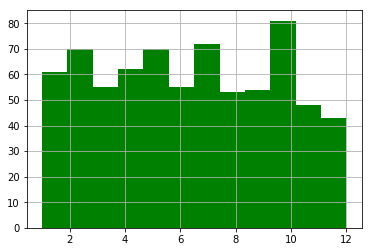

In [3]:
user_df['created_month'] = user_df['created_at'].dt.month
user_df['created_month'].hist(bins=12, color='g')

### Pandas Timeseries
Let's take a look at a timeseries plot. We'll use the tweet data and collect up counts of tweets by day and plot that...

Panads plots return a matplotlib `ax` object. We cannot access all of the elements that we might want when calling the plot directly from pandas, but if we set the plot to a variable, we can then make any additions necessary.

In [4]:
tweet_df['tweet_date'] = tweet_df['created_at'].dt.date
tweets_by_day = tweet_df[['tweet_date', 'tweet_id']].groupby('tweet_date').agg('count')
tweets_by_day

,tweet_id
tweet_date,
2018-03-07,113
2018-03-09,176
2018-03-11,24
2018-06-07,87
2018-08-03,217
2018-08-04,58
2018-08-05,59
2018-08-06,47
2018-08-07,19


Text(0,0.5,'Tweet Count')

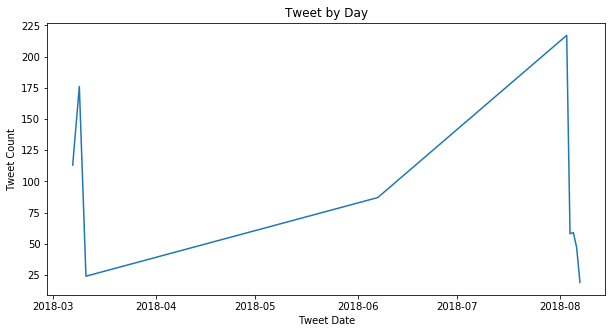

In [5]:
ax = tweets_by_day['tweet_id'].plot(title='Tweet by Day', figsize=(10,5))
ax.set_xlabel('Tweet Date')
ax.set_ylabel('Tweet Count')

## Plotting directly with Matplotlib
From one of the plotting requests from Bob, we'll create a bar plot with the following:
* The categories of the categorical variable along the vertical axis
* The mean/percentage of the binary variable (1 values) along the horizontal axis
* Confidence intervals at the ends of the bars

First we'll create another data grouping to get to the means and standard deviations that we need for the plot:

In [6]:
plot_data = tweets_classified.groupby(['topic'])['class'].agg(['mean', 'std', 'count'])
plot_data['sqr_count'] = [sqrt(x) for x in plot_data['count']]
plot_data['SE'] = plot_data['std']/plot_data['sqr_count']
del(plot_data['sqr_count'])
plot_data.sort_values('mean', inplace=True)
plot_data

,mean,std,count,SE
topic,,,,
Divorce,0.057522,0.233354,226,0.015523
Birth,0.135678,0.343310,199,0.024337
Moving,0.183333,0.387748,240,0.025029
Graduation,0.340708,0.474999,226,0.031596
Marriage,0.543568,0.779403,241,0.050206


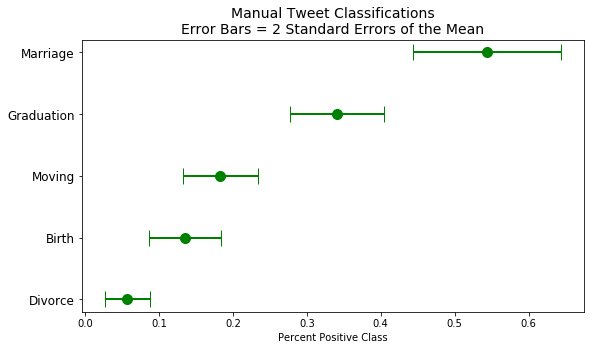

In [7]:
# Plot again using Matplotlib directly
# define the location on the y axis - based on the number of topics
fig, ax = plt.subplots(figsize=(9,5))
y_pos = np.arange(len(plot_data))
class_avg = plot_data['mean']
error = 2*plot_data['SE']

ax.errorbar(class_avg, 
            y_pos,
            xerr=error, 
            capsize = 8,
            fmt='o', 
            markersize=10, 
            linewidth=2, 
            color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_data.index, size=12)
# ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percent Positive Class')
ax.set_title('Manual Tweet Classifications\nError Bars = 2 Standard Errors of the Mean', size=14)

plt.show()

## Seaborn
Seaborn adds a number of statistical graphing capabilities to Matplotlib.

In [11]:
user_df.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'followers_count',
       'friends_count', 'favourites_count', 'description', 'geo_enabled',
       'lang', 'statuses_count', 'time_zone', 'created_at', 'verified',
       'utc_offset', 'contributors_enabled', 'listed_count', 'protected',
       'url', 'state', 'created_month'],
      dtype='object')

In [13]:
?sns.relplot

Signature: sns.relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
Docstring:
Figure-level interface for drawing relational plots onto a FacetGrid.

This function provides access to several different axes-level functions
that show the relationship between two variables with semantic mappings
of subsets. The ``kind`` parameter selects the underlying axes-level
function to use:

- :func:`scatterplot` (with ``kind="scatter"``; the default)
- :func:`lineplot` (with ``kind="line"``)

Extra keyword arguments are passed to the underlying function, so you
should refer to the documentation for each to see kind-specific options.

The relationship between ``x`` and ``y`` can be shown for different subsets


In [10]:
sns.relplot(x='followers_count', )

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


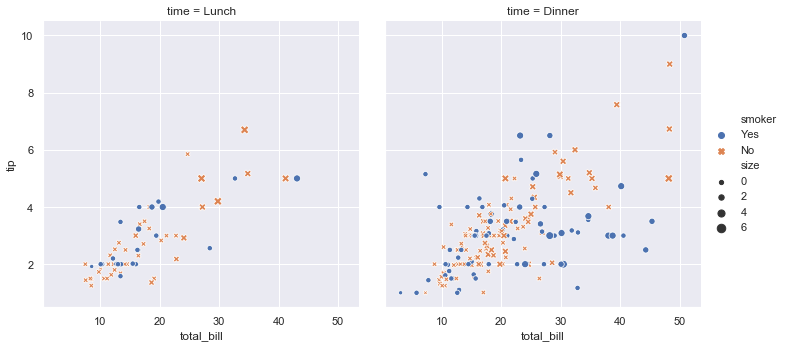

In [8]:
sns.set()
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

In [9]:
sns.version

AttributeError: module 'seaborn' has no attribute 'version'